In [1]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# Creating a Function to call our API
def Api_call(symbol):
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"
    querystring = {"frequency":"1d","filter":"history","period1":"1560643200","period2":"1592265600","symbol":symbol}
    headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "ec9831563dmsh5c355f85927aba5p1ac11ajsn43d369039a77"
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    return response.json()
zm_stocks = Api_call("AMZN")

In [2]:
## Creating a Dataframe & Convert Epoch dates to datetime
def Epoch_dates(zm_stocks):
    df= pd.DataFrame(zm_stocks['prices'], columns=['date','open', 'high','low','close','volume','adjclose'])
    df['date'] = pd.to_datetime(df['date'], unit= 's')
    df['date'] = df['date'].dt.date
    cols = ["date",'open','high','low','close','volume']
    df = df[cols].round(2)
    return df

converted_dates = Epoch_dates(zm_stocks)
df_zm_stocks = Epoch_dates(zm_stocks)
df_zm_stocks

,date,open,high,low,close,volume
0,2020-06-15,2526.60,2584.00,2508.00,2572.68,3865100
1,2020-06-12,2601.21,2621.48,2503.35,2545.02,5429600
2,2020-06-11,2603.50,2671.38,2536.23,2557.96,5800100
3,2020-06-10,2645.00,2722.35,2626.26,2647.45,4946000
4,2020-06-09,2529.44,2626.43,2525.00,2600.86,5176000
...,...,...,...,...,...,...
247,2019-06-21,1916.10,1925.95,1907.58,1911.30,3933600
248,2019-06-20,1933.33,1935.20,1905.80,1918.19,3217200
249,2019-06-19,1907.84,1919.58,1892.47,1908.79,2895300
250,2019-06-18,1901.35,1921.67,1899.79,1901.37,3895700


In [3]:
## Adding columnns for Volatility & price/share
def v_ps_calculation(df):
    #Volatility high-low
    df["high_low"] = df["high"] - df["low"]
    #Price/share close/volume
    df["price/share"] = df["close"] / df["volume"]
    return df
df_calculations = v_ps_calculation(df_zm_stocks)
df_calculations

,date,open,high,low,close,volume,high_low,price/share
0,2020-06-15,2526.60,2584.00,2508.00,2572.68,3865100,76.00,0.000666
1,2020-06-12,2601.21,2621.48,2503.35,2545.02,5429600,118.13,0.000469
2,2020-06-11,2603.50,2671.38,2536.23,2557.96,5800100,135.15,0.000441
3,2020-06-10,2645.00,2722.35,2626.26,2647.45,4946000,96.09,0.000535
4,2020-06-09,2529.44,2626.43,2525.00,2600.86,5176000,101.43,0.000502
...,...,...,...,...,...,...,...,...
247,2019-06-21,1916.10,1925.95,1907.58,1911.30,3933600,18.37,0.000486
248,2019-06-20,1933.33,1935.20,1905.80,1918.19,3217200,29.40,0.000596
249,2019-06-19,1907.84,1919.58,1892.47,1908.79,2895300,27.11,0.000659
250,2019-06-18,1901.35,1921.67,1899.79,1901.37,3895700,21.88,0.000488


In [42]:
#zm_stocks = Api_call("ZM")
def Getstockprice_df(symbol):
    json = Api_call(symbol)
    df = Epoch_dates(json)
    return df

data = Getstockprice_df(df_zm_stocks)
Getstockprice_df("AMZN")

,date,open,high,low,close,volume
0,2020-06-15,2526.60,2584.00,2508.00,2572.68,3865100
1,2020-06-12,2601.21,2621.48,2503.35,2545.02,5429600
2,2020-06-11,2603.50,2671.38,2536.23,2557.96,5800100
3,2020-06-10,2645.00,2722.35,2626.26,2647.45,4946000
4,2020-06-09,2529.44,2626.43,2525.00,2600.86,5176000
...,...,...,...,...,...,...
247,2019-06-21,1916.10,1925.95,1907.58,1911.30,3933600
248,2019-06-20,1933.33,1935.20,1905.80,1918.19,3217200
249,2019-06-19,1907.84,1919.58,1892.47,1908.79,2895300
250,2019-06-18,1901.35,1921.67,1899.79,1901.37,3895700


In [14]:
#Saving it to our pc to a JSON file
def json_saver(df):
    df = df_zm_stocks.to_json("../data_ber_project_pandas/zoom_shareprice.json")
    return df
json_saver(df_zm_stocks)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

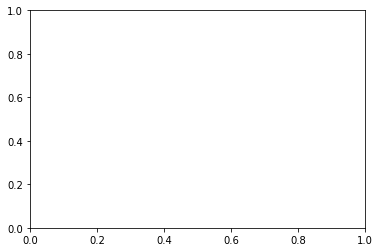

In [35]:

plt.ylabel(data["high"])